# Passo 1 - Importando as bibliotecas

In [121]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm

# balancear os dados
import imblearn
# valanceamento e clase - oversmpling
from imblearn.over_sampling import SMOTE

In [114]:
!pip install -q imblearn

# Passo 2 - Lendo os dados

In [107]:
df = pd.read_csv('online_shoppers_intention.csv')

In [108]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Passo 3 - Análise Exploratória

In [19]:
df.shape

(12330, 18)

In [20]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [21]:
# Observando valores nulos

print(df.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [22]:
# verificando valores únicos
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [23]:
# Cópia do dataset original

df1 = df.copy()

In [24]:
# Lista vazias para os resultados

continuous = []
categorical = []

In [25]:
for c in df.columns[:-1]:
    if df1.nunique()[c] >=30:
        continuous.append(c)
    else:
        categorical.append(c)

In [27]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [30]:
df1[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1,0.000000,0.20,0.20,0.0
1,0.0,0.0,2,64.000000,0.00,0.10,0.0
2,0.0,0.0,1,0.000000,0.20,0.20,0.0
3,0.0,0.0,2,2.666667,0.05,0.14,0.0
4,0.0,0.0,10,627.500000,0.02,0.05,0.0


In [34]:
df1[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0,0.0,Feb,3,3,1,4,Returning_Visitor,True


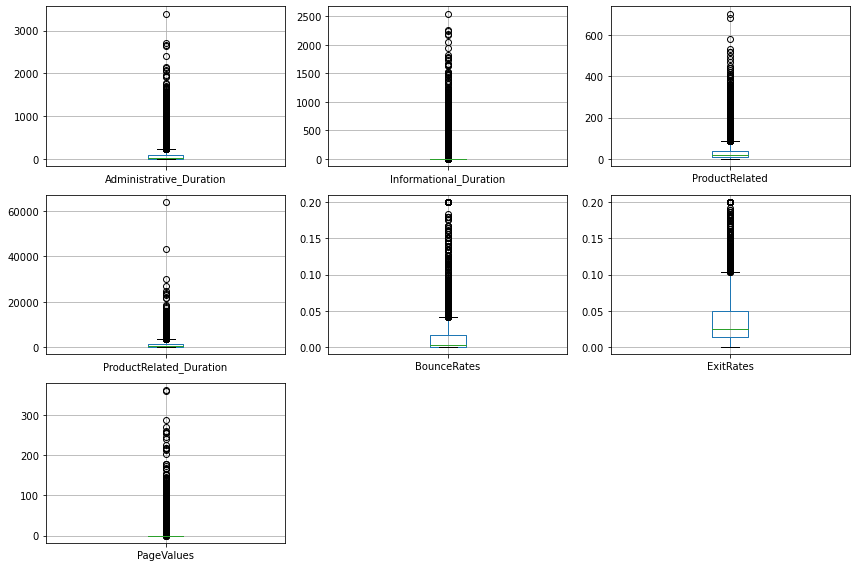

In [44]:
#Plot das variáveis contínuas 

fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df1.boxplot(col);
    plt.tight_layout()

# plt.savefig('boxplot1.png')

# Fazer uma transformação para melhor visualizar os dados tendo em vista que no boxplot os dados estão bastante distorcidos.

In [47]:
df1[continuous] = np.log1p(1+df1[continuous])

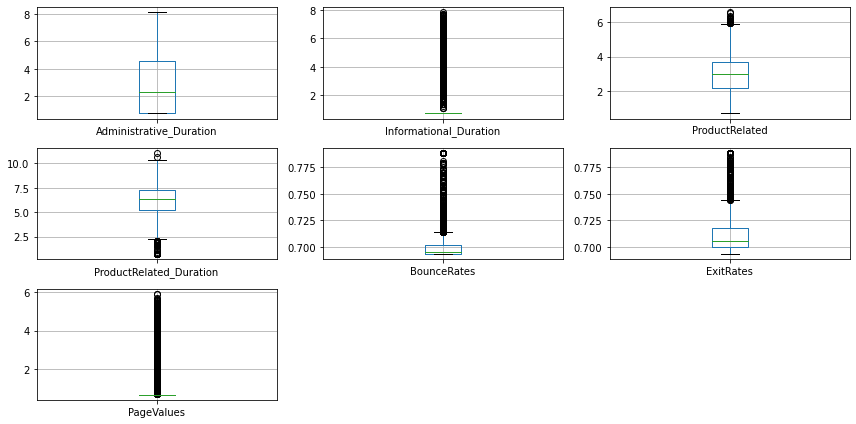

In [48]:
fig = plt.figure(figsize=(12,6))

for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df1.boxplot(col);
    plt.tight_layout()

In [51]:
df1[continuous].columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

# Matrix de corelação

<AxesSubplot:>

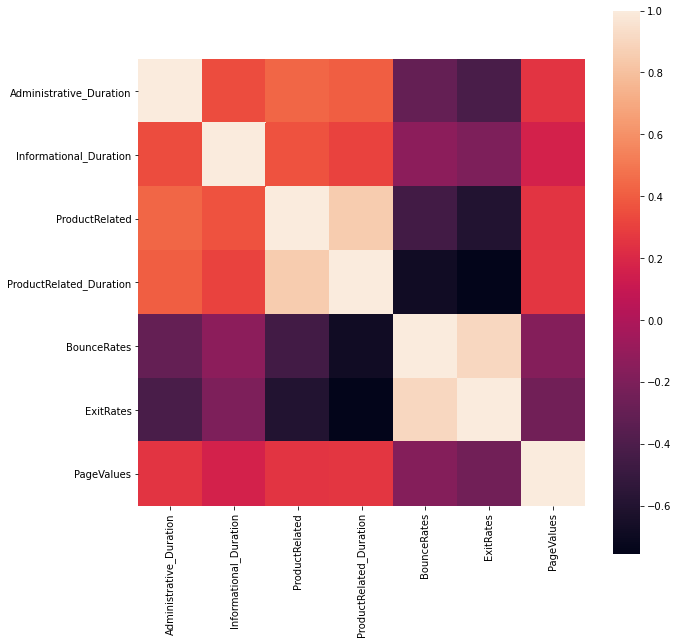

In [57]:
plt.figure(figsize=(10,10))

sns.heatmap(df1[df1[continuous].columns].corr(), vmax = 1., square = True)

# Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é influenciada por elas 

<AxesSubplot:title={'center':'Venda ou não'}, xlabel='Revenue', ylabel='count'>

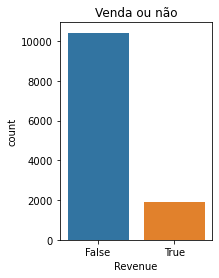

In [60]:
plt.subplot(1,2,2)
plt.title('Venda ou não')
sns.countplot(df1['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

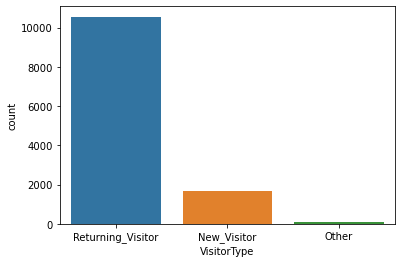

In [61]:
# Countplot tipo de visitante
plt.xlabel('Tipo de Visitante')
sns.countplot(df1['VisitorType'])

<AxesSubplot:xlabel='VisitorType'>

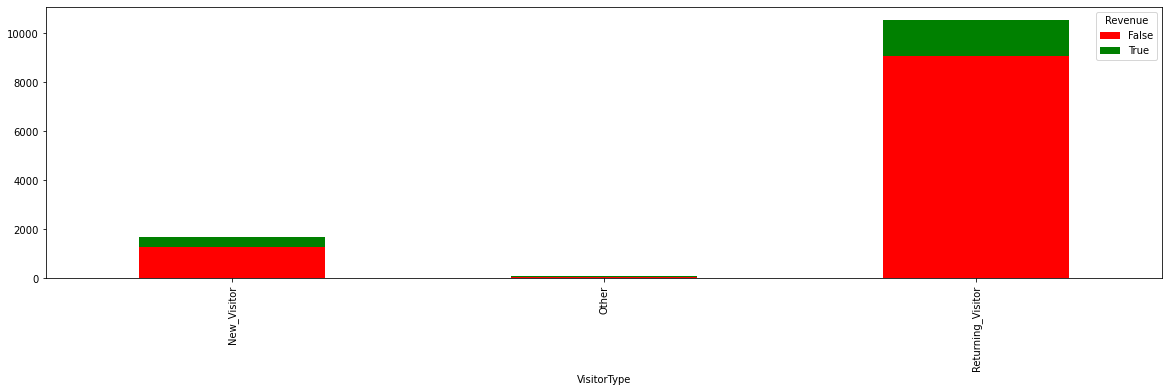

In [62]:
# Stacked Bar tipo de isitante x revenue

pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar',stacked= True, figsize=(20,5), color=['red','green'])

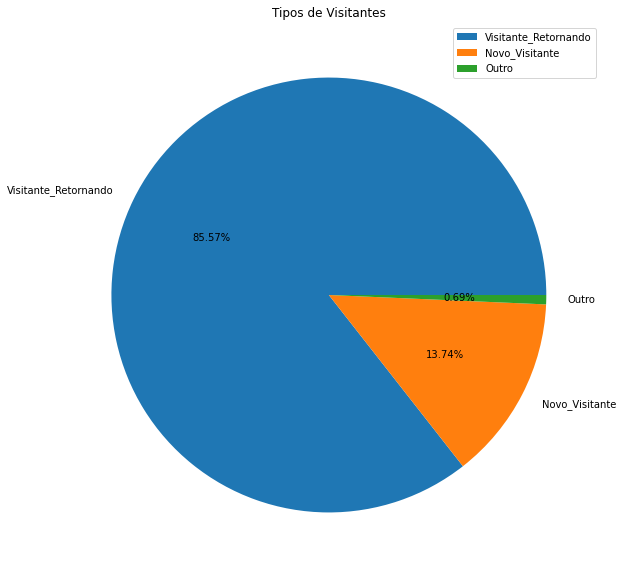

In [64]:
# Pie Chart tipos de visitantes
plt.figure(figsize=(10,10))
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title('Tipos de Visitantes')
plt.pie(df1['VisitorType'].value_counts(), labels= labels, autopct='%.2f%%')
plt.legend()

<AxesSubplot:title={'center':'Final de semana ou não'}, xlabel='Weekend', ylabel='count'>

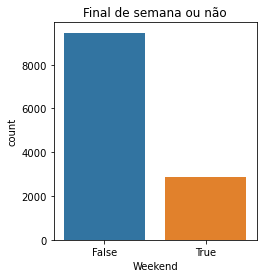

In [68]:
# Countplot final de semana ou não
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Final de semana ou não')
sns.countplot(df['Weekend'])

<AxesSubplot:xlabel='Weekend'>

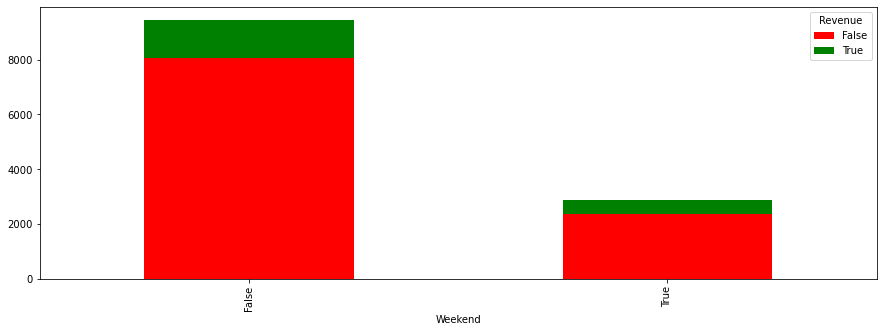

In [75]:
# Stacked Bar Final de semana x revenue

pd.crosstab(df1['Weekend'], df1['Revenue']).plot(kind='bar', stacked=True, figsize=(15,5), color=['red','green'])

<AxesSubplot:title={'center':'Tipos de sistemas operacionais'}, xlabel='OperatingSystems', ylabel='count'>

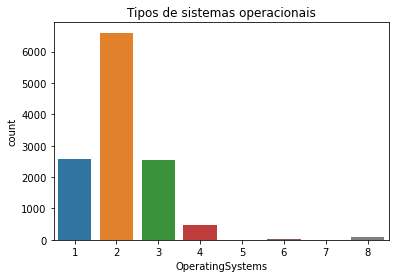

In [76]:
# Tipos de sistemas operacionais

plt.title('Tipos de sistemas operacionais')
plt.xlabel('Sistema operacional usaso')
sns.countplot(df1['OperatingSystems'])

<AxesSubplot:xlabel='TrafficType'>

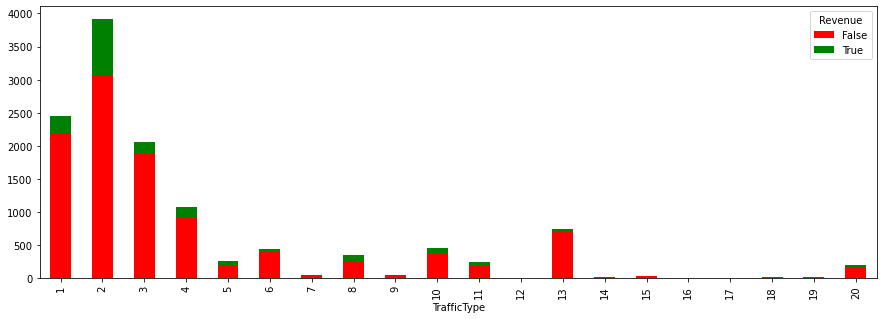

In [78]:
# Tipo de trafico
pd.crosstab(df1['TrafficType'], df1['Revenue']).plot(kind='bar', stacked=True, figsize=(15,5), color=['red','green'])

# Pré-Processamento dos Dados

In [109]:
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [110]:
#Tratando os dados string 'Month', 'VisitorType'

#Aplica o encoder nas variáveis que estão com string
lb = LabelEncoder()

In [111]:
df['Month'] = lb.fit_transform(df['Month'])
df['VisitorType'] = lb.fit_transform(df['VisitorType'])

In [91]:
# Para esse metodo de enconder as vezes pode gerar linhas com valores NA
# df.dropna(inplace = True)

In [112]:
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,False,False


# Variavel resposta esta balanceada?
#### Problemas de escala

In [113]:
target_count = df.Revenue.value_counts()
target_count

False    10422
True      1908
Name: Revenue, dtype: int64

# Separando dos dados em explicativas e Target

In [126]:
# Variável explicativas
df_explicativas = df.iloc[:,0:17]


In [128]:
df_target = df.iloc[:,17]

# Balanceamento de Classe - Oversampling

In [122]:
seed = 100
smote_bal = SMOTE(random_state= seed)

In [129]:
#Aplicando o balanceador
X_df_explicativas, y_df_target = smote_bal.fit_resample(df_explicativas, df_target)



In [130]:
# plot do balanciamento. Veremos que os valores de pessoas que compraram é semelhante a quantidade de pessoas que não compraram

Text(0.5, 0, 'Não compraram / compraram')

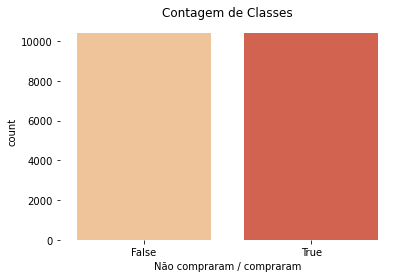

In [138]:
sns.countplot(y_df_target, palette= 'OrRd')
plt.box(False)
plt.title('Contagem de Classes')

plt.xlabel('Não compraram / compraram')

In [139]:
# Shape dos dados originais

df.shape

(12330, 18)

In [144]:
# Shape dos dados reamostrados
y_df_target.shape


(20844,)

In [142]:
X_df_explicativas.shape

(20844, 17)

# Renomeados dos dados ajustados

In [145]:
X = X_df_explicativas

In [146]:
y = y_df_target

In [151]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3,  random_state=42)

# Modelo SVM

#### Modelo base Kernel Linear

In [149]:
modelo_v1 = svm.SVC(kernel='linear')

In [152]:
# Treinamento do modelo
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print('tempo de treinamento do modelo:', end - start)

tempo de treinamento do modelo: 9373.848403453827


In [153]:
previsoes_v1 = modelo_v1.predict(X_teste)

In [154]:
# Dicionário de métricas e metadados

SVM_dict_v1={'Modelo':'SVM',
            'Versão':'1',
            'Kernel':'Linear',
            'Precision':precision_score(previsoes_v1,y_teste),
            'Recall':recall_score(previsoes_v1,y_teste),
            'F1 Score':f1_score(previsoes_v1,y_teste),
            'Acurácia':accuracy_score(previsoes_v1,y_teste),
            'AUC':roc_auc_score(previsoes_v1,y_teste)}

In [156]:
print('Metrícas em teste:')
SVM_dict_v1


Metrícas em teste:


{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.8738422229319707,
 'Recall': 0.8159856844616761,
 'F1 Score': 0.8439235040098705,
 'Acurácia': 0.8381835625199872,
 'AUC': 0.8399128698075358}